# Class Session 4 Exercise:
## Comparing asymptotic running time for enumerating neighbors of all vertices in a graph

We will measure the running time for enumerating the neighbor vertices for three different data structures for representing the graph:
    adjacency matrix
    adjacency list
    edge list
    
First, we import all the R packages that we will need for this exercise:

In [ ]:
library(igraph)

Define a function that enumerates the neighbors of a vertex i, when the 
graph is stored in adjacency matrix format (ones and zeroes).  Use the `which` function.

In [ ]:
enumerate_matrix <- function(gmat, i) {
    FILL IN HERE
}

Define a function that enumerates the neighbors of a vertex i, when the 
graph is stored in adjacency list format. Use the `[[` function (i..e, array indexing).

In [ ]:
enumerate_adj_list <- function(adj_list, i) {
    FILL IN HERE
}

Define a function that enumerates the neighbors of a vertex i, when the 
graph is stored in edge-list format.  Use the `which` function and then the `c` (concatenate) function.

In [ ]:
enumerate_edge_list <- function(edge_list, i) {
    inds1 <- FILL IN HERE
    inds2 <- FILL IN HERE
    c(edge_list[inds1,2], edge_list[inds2,1])
}

This next function is the simulation funtion. Use the `sample_pa` function in igraph to generate a Barabasi-Albert (undirected) graph, with n vertices and m=5 (which should have number of edges equal to nm - m^2 / 2 - m/2).
It returns a length-three list containing the average running time for enumerating the neighbor vertices of a vertex in the graph. 

In [19]:
dosim <- function(n) {

    nrep <- 10
    nsubrep <- 10
    
    simdf <- do.call(rbind,
                     replicate(nrep, {
                        # make a random undirected graph with fixed (average) vertex degree = 5
                         g <- FILL IN HERE
                         
                         g_matrix <- # use igraph as_adjacency_matrix and then R as.matrix
                         g_adj_list <- # use igraph as_adj_list
                         g_edge_list <- # use igraph as_edgelist

                         time_mat <- system.time(
                             replicate(nsubrep, {
                                 lapply(1:n,
                                        function(i) {
                                            # call enumerate_matrix for g_matrix and vertex i
                                        })
                             })
                         )[1]
                         
                         time_adj_list <- system.time(
                             replicate(nsubrep, {
                                 lapply(1:n,
                                        function(i) {
                                            # call enumerate_adj_list for g_matrix and vertex i                                            
                                        })
                             })
                         )[1]
                         
                         time_edge_list <- system.time(
                             replicate(nsubrep, {
                                 lapply(1:n,
                                        function(i) {
                                            # call enumerate_edge_list for g_matrix and vertex i                                                
                                        })
                             })
                         )[1]

                         rowdf <- data.frame(matrix=time_mat,
                                             adjlist=time_adj_list,
                                             edgelist=time_edge_list)
                         
                         rowdf
                     }, simplify=FALSE)
                     )
    
    # average over replicates
    simres <- apply(simdf, 2, mean)
    
    # divide by n so that the running time results are on a per-vertex basis
    simres/n
}


Run the function for the graphs of 100, 300, and 500 vertices, and gather the results in a list:

In [20]:
nvals <- c(100, 300, 500)
sim_data_list <- lapply(nvals, dosim)

Rescale the list to make the numbers in milliseconds:

In [110]:
sim_data_list_rescaled <- lapply(sim_data_list, function(v) {v*1000})

Let's have a look at the data in the list format:

In [28]:
sim_data_list_rescaled

[[1]]
  matrix  adjlist edgelist 
 0.02876  0.00176  0.18432 

[[2]]
  matrix  adjlist edgelist 
 0.06960  0.00172  0.35324 

[[3]]
     matrix     adjlist    edgelist 
0.102840000 0.001733333 0.516826667 

[[4]]
  matrix  adjlist edgelist 
 0.13847  0.00185  0.67510 

[[5]]
  matrix  adjlist edgelist 
0.168968 0.001856 0.806472

Convert the list to a wide data frame, using do.call and rbind; make the network size the first column of the data frame (and as a factor)

In [78]:
sim_data_list_df <- data.frame(network_size=as.factor(nvals),
                               do.call(rbind, sim_data_list_rescaled))

Let's have a look at the wide data frame format:

In [79]:
sim_data_list_df

network_size,matrix,adjlist,edgelist
1000,0.028760,0.001760000,0.1843200
2000,0.069600,0.001720000,0.3532400
3000,0.102840,0.001733333,0.5168267
4000,0.138470,0.001850000,0.6751000
5000,0.168968,0.001856000,0.8064720


"Melt" the data into a narrow format:

In [80]:
library(dplyr)
library(reshape2)
sim_data_list_melted <- melt(sim_data_list_df, id.vars="network_size")

Let's have a look at the narrow data frame format:

In [81]:
sim_data_list_melted

network_size,variable,value
1000,matrix,0.028760000
2000,matrix,0.069600000
3000,matrix,0.102840000
4000,matrix,0.138470000
5000,matrix,0.168968000
1000,adjlist,0.001760000
2000,adjlist,0.001720000
3000,adjlist,0.001733333
4000,adjlist,0.001850000
5000,adjlist,0.001856000


Let's plot the data.  The "barchart" function in lattice graphics is a nice way to plot a grouped bar plot from a narrow data frame. 

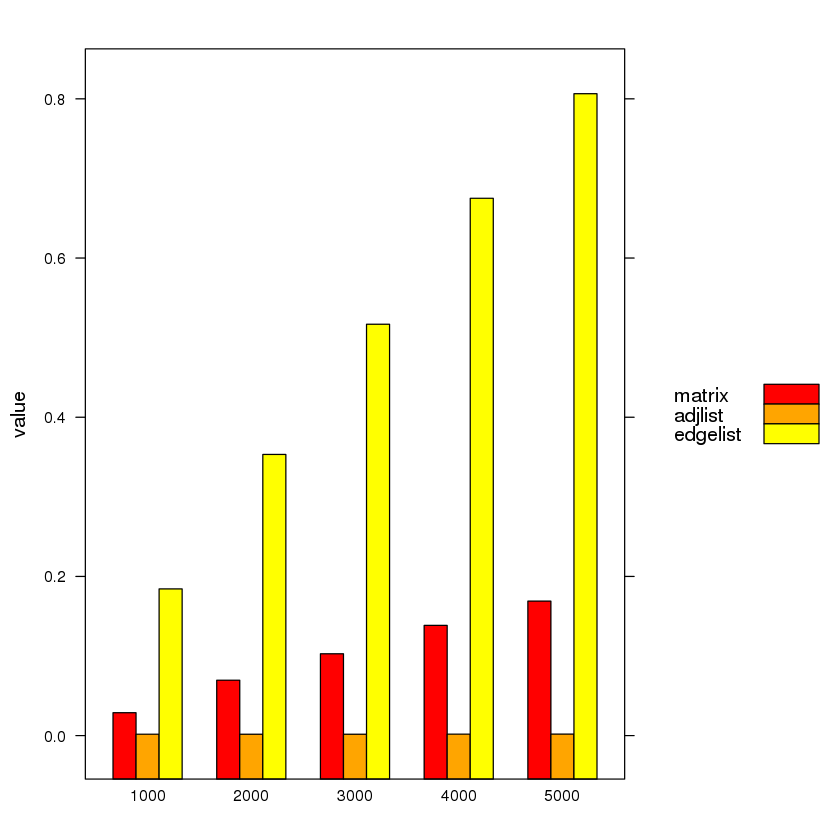

In [108]:
library(lattice)
colors = c('red', 'orange', 'yellow')
barchart(value~network_size, data=sim_data_list_melted, groups=variable,
         auto.key=list(space='right'),
        par.settings=list(superpose.polygon=list(col=colors)))